Importando módulos y librerías necesarias

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets, svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import KFold 

import matplotlib.pyplot as plt

from scipy.stats import ttest_rel

import scipy.io
import pandas as pd

from sklearn.decomposition import PCA

Cargando datos

In [2]:

# Cargar el archivo .mat
emnist_data = scipy.io.loadmat('./emnist-letters.mat')

# Obtener los datos de entrenamiento y etiquetas
X_train = emnist_data['dataset'][0][0]['train'][0][0]['images']
y_train = emnist_data['dataset'][0][0]['train'][0][0]['labels']

X_test = emnist_data['dataset']['test'][0, 0]['images'][0, 0]
y_test = emnist_data['dataset']['test'][0, 0]['labels'][0, 0]


In [3]:
# Modificando las etiquetas de las clases para hacerlas coincidir con el conjunto
# de embeddings que se va a utilizar: [1,26] -> [0,25] 
y_train = y_train - 1
y_test = y_test -1 


In [4]:

unique_labels_train = np.unique(y_train)
print("Valores únicos en las etiquetas de entrenamiento corregidas:", unique_labels_train)

unique_labels_test = np.unique(y_test)
print("Valores únicos en las etiquetas de prueba corregidas:", unique_labels_test)

Valores únicos en las etiquetas de entrenamiento corregidas: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Valores únicos en las etiquetas de prueba corregidas: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]


Seleccionando aleatoriamente el subconjunto de entrenamiento y prueba a partir de los datos cargados

In [8]:

np.random.seed(100)

train_indices = []
test_indices = []

# Seleccionando 1000 datos aleatorios de cada clase para entrenamiento
# y 100 aleatorios de cada clase para prueba
for i in unique_labels_train:
    # Seleccionar todos los datos de una clase
    trainclass = np.where(y_train == i)
    trainclass = np.array(trainclass[0])

    testclass = np.where(y_test == i)
    testclass = np.array(testclass[0])

    # Sacar 1000 y 100 muestras aleatorias de los datos de cada clase
    random_indices_train = np.random.choice(trainclass, size=1000, replace=False)

    random_indices_test = np.random.choice(testclass, size=100, replace=False)

    # Guardar los índices
    train_indices = train_indices + list(random_indices_train)
    test_indices = test_indices + list(random_indices_test)

# Reordenar los datos
np.random.shuffle(train_indices)
np.random.shuffle(test_indices)

# Sacar los conjuntos en base a los índices
x_trainset = np.array(X_train[train_indices])
y_trainset = np.array(y_train[train_indices])


x_testset = np.array(X_test[test_indices])
y_testset = np.array(y_test[test_indices])


y_trainset = np.squeeze(y_trainset)
y_testset = np.squeeze(y_testset)







    





Funciones que entrenan los modelos con parámetros o sin parámetros (parámetros por defecto)

In [6]:
def trainSVM(x_train, y_train, x_test):
    svm_model = svm.SVC(kernel='rbf')
    svm_model.fit(x_train, y_train)

    y_pred = svm_model.predict(x_test)

    return svm_model, y_pred


def trainSVMParams(x_train, y_train, x_test, C, gamma):
    svm_model = svm.SVC(kernel='rbf', C=C, gamma=gamma)
    svm_model.fit(x_train, y_train)

    y_pred = svm_model.predict(x_test)

    return svm_model, y_pred

Función para calcular y graficar las métricas necesarias para evaluar el modelo

In [63]:

def metrics(test, pred,title,classes):
# Calcular las métricas por clase


    # Métricas
    
    precision = precision_score(test, pred, average=None,labels=classes)
    recall = recall_score(test, pred, average=None,labels=classes)
    f1 = f1_score(test, pred, average=None,labels=classes)



    # Gráfico de barras
    width = 0.25  

    fig, ax = plt.subplots()
    ax.bar(classes - width, precision, width, label='Precisión')
    ax.bar(classes, recall, width, label='Recall')
    ax.bar(classes + width, f1, width, label='F1-score')


    ax.set_xlabel('Clase')
    ax.set_title(title)
    ax.set_ylabel('Métrica')
    ax.set_xticks(classes)
    ax.set_xticklabels(classes)
    ax.legend()

    plt.tight_layout()
    plt.show()

    # Matriz de confusión
    confusion = confusion_matrix(pred, test)

    
    fig, ax2 = plt.subplots()
 
    cax = ax2.matshow(confusion, cmap='Greens')

    plt.xlabel('Clases predichas')
    plt.ylabel('Clases reales')
    plt.title('Matriz de confusión - ' + title)
    plt.colorbar(cax)


    for i in range(confusion.shape[0]):
        for j in range(confusion.shape[1]):
            plt.text(j, i, str(confusion[i, j]), ha='center', va='center', color='black')

    plt.show()


    table = classification_report(pred, test)

    print(table)






1) Entrenando modelo 1 con parámetros por defecto y 1000 datos de entrenamiento de cada clase

In [44]:
svm1, y_pred1 = trainSVM(x_trainset, y_trainset, x_testset)

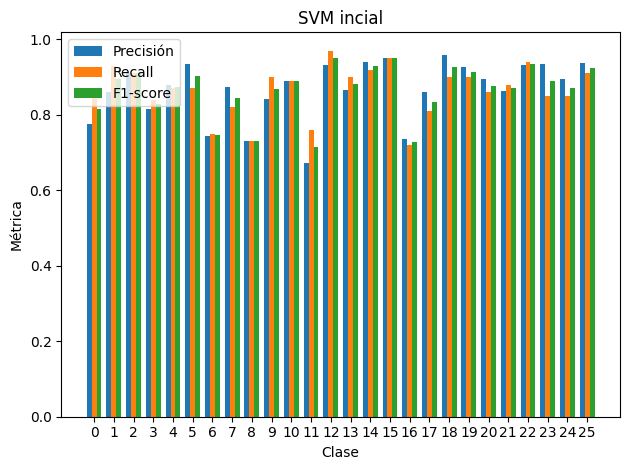

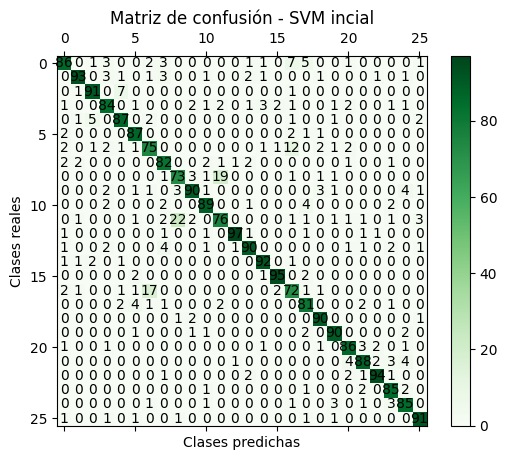

              precision    recall  f1-score   support

           0       0.86      0.77      0.82       111
           1       0.93      0.86      0.89       108
           2       0.91      0.91      0.91       100
           3       0.84      0.82      0.83       103
           4       0.87      0.88      0.87        99
           5       0.87      0.94      0.90        93
           6       0.75      0.74      0.75       101
           7       0.82      0.87      0.85        94
           8       0.73      0.73      0.73       100
           9       0.90      0.84      0.87       107
          10       0.89      0.89      0.89       100
          11       0.76      0.67      0.71       113
          12       0.97      0.93      0.95       104
          13       0.90      0.87      0.88       104
          14       0.92      0.94      0.93        98
          15       0.95      0.95      0.95       100
          16       0.72      0.73      0.73        98
          17       0.81    

In [65]:
metrics(y_testset, y_pred1,'SVM incial',unique_labels_train)

Función que busca el mejor modelo para una lista de hiperparámetros

In [102]:

def best_model(x_train, y_train, x_test, y_test, params):

    max_accuracy = 0
  
    for p in params:
        svm, y_pred = trainSVMParams(x_train, y_train, x_test, p[0], p[1])
        accuracy = accuracy_score(y_test, y_pred)

        if accuracy > max_accuracy:
            max_accuracy = accuracy
            best_params = p
            best_svm = svm
            best_y_pred = y_pred

    
    return best_params, best_svm, best_y_pred

        

Probar un conjunto de modelos con distintas combinaciones de hiperparámetros C y gamma

In [103]:

params = [[0.2, 0.001], [0.5, 0.01], [1, 0.1], [10, 1], [100, 10], [1000, 100]]
best_params, best_svm, best_y_pred = best_model(x_trainset, y_trainset, x_testset, y_testset, params)

In [104]:
best_params

[0.2, 0.001]

/home/danielps/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


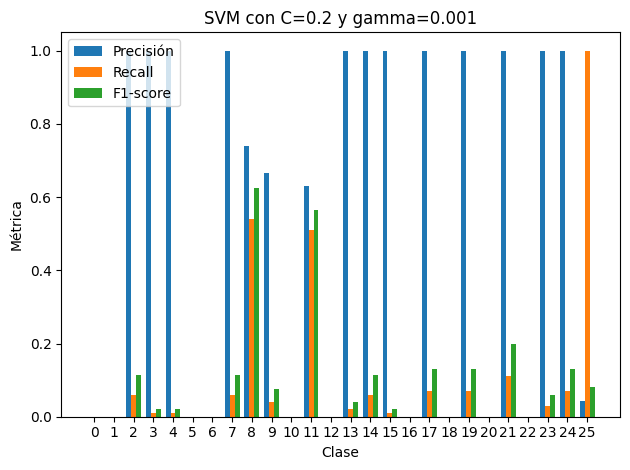

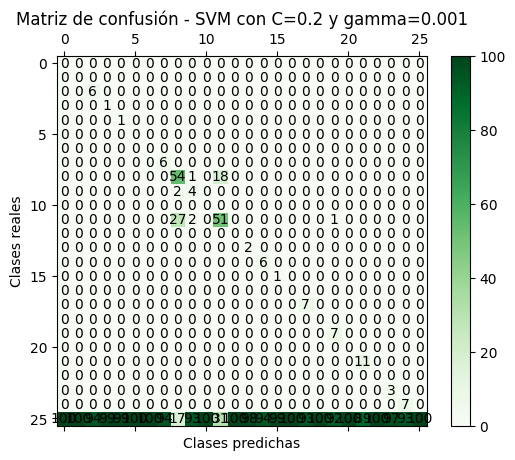

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.06      1.00      0.11         6
           3       0.01      1.00      0.02         1
           4       0.01      1.00      0.02         1
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.06      1.00      0.11         6
           8       0.54      0.74      0.62        73
           9       0.04      0.67      0.08         6
          10       0.00      0.00      0.00         0
          11       0.51      0.63      0.56        81
          12       0.00      0.00      0.00         0
          13       0.02      1.00      0.04         2
          14       0.06      1.00      0.11         6
          15       0.01      1.00      0.02         1
          16       0.00      0.00      0.00         0
          17       0.07    

/home/danielps/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielps/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielps/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [111]:
metrics(y_testset, best_y_pred,'SVM con C=0.2 y gamma=0.001',unique_labels_train)

Conclusión: Quitar los parámetros por defecto empeora el modelo incluso para el mejor caso.

2. Entrenando el conjunto de datos reduciendo la dimensionalidad a 128

In [67]:

pca = PCA(n_components=128)

# Ajustar el PCA al conjunto de datos
pca.fit(x_trainset)

# Obtener las componentes principales y transformar el conjunto de datos
x_pcaTrain = pca.transform(x_trainset)
x_pcaTest = pca.transform(x_testset)

In [68]:
svmPCA, y_predPCA = trainSVM(x_pcaTrain, y_trainset, x_pcaTest)

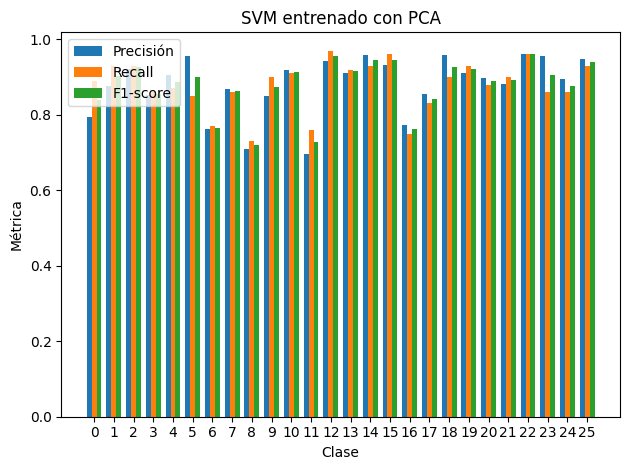

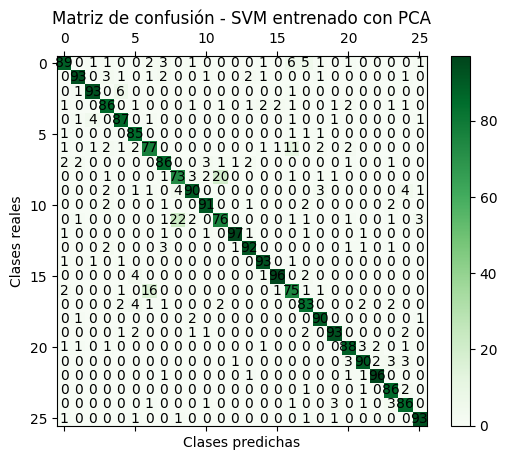

              precision    recall  f1-score   support

           0       0.89      0.79      0.84       112
           1       0.93      0.88      0.90       106
           2       0.93      0.92      0.93       101
           3       0.86      0.85      0.86       101
           4       0.87      0.91      0.89        96
           5       0.85      0.96      0.90        89
           6       0.77      0.76      0.77       101
           7       0.86      0.87      0.86        99
           8       0.73      0.71      0.72       103
           9       0.90      0.85      0.87       106
          10       0.91      0.92      0.91        99
          11       0.76      0.70      0.73       109
          12       0.97      0.94      0.96       103
          13       0.92      0.91      0.92       101
          14       0.93      0.96      0.94        97
          15       0.96      0.93      0.95       103
          16       0.75      0.77      0.76        97
          17       0.83    

In [69]:
metrics(y_testset, y_predPCA,'SVM entrenado con PCA',unique_labels_train)


3. Usando los datos como salidas de embedding de una red neuronal para entrenar los modelos.


In [25]:
# Leyendo datos
df1 = pd.read_csv("./embedding/train_embeddings.csv").dropna().reset_index(drop=True)
df2 = pd.read_csv("./embedding/test_embeddings.csv").dropna().reset_index(drop=True)


In [26]:

x_trainNN = df1.drop(columns=["label"]).values
y_trainNN = df1.loc[:, "label"].values


x_testNN = df2.drop(columns=["label"]).values
y_testNN = df2.loc[:, "label"].values


# Seleccionando los mismos datos que usaron los clasificadores anteriores

x_trainNN = np.array(x_trainNN[train_indices])
y_trainNN = np.array(y_trainNN[train_indices])


x_testNN = np.array(x_testNN[test_indices])
y_testNN = np.array(y_testNN[test_indices])

y_train = np.squeeze(y_trainNN)
y_test = np.squeeze(y_testNN)


In [38]:
unique_labelsNN = np.unique(y_trainNN)
unique_labelsNN

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

In [39]:
svmNN, y_predNN = trainSVM(x_trainNN, y_trainNN, x_testNN)


26


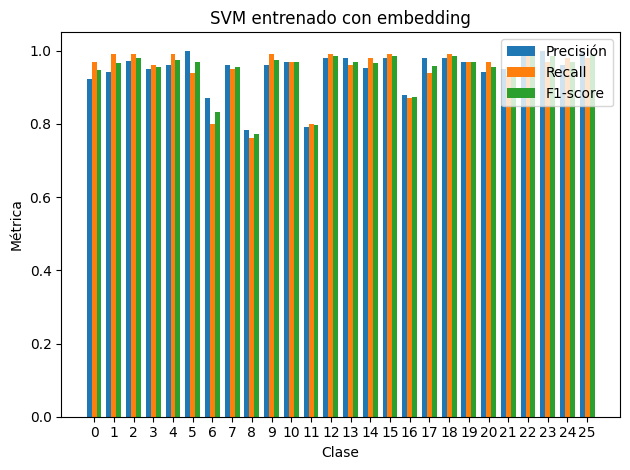

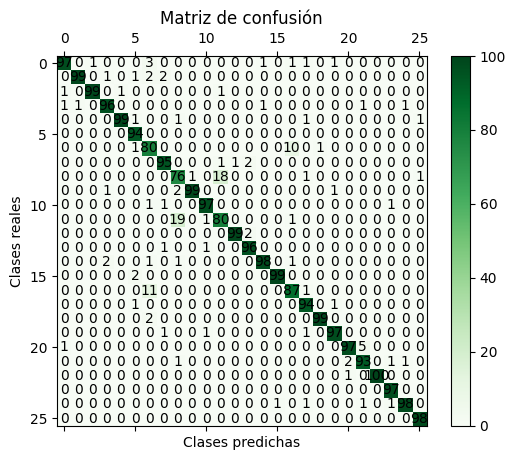

              precision    recall  f1-score   support

           0       0.97      0.92      0.95       105
           1       0.99      0.94      0.97       105
           2       0.99      0.97      0.98       102
           3       0.96      0.95      0.96       101
           4       0.99      0.96      0.98       103
           5       0.94      1.00      0.97        94
           6       0.80      0.87      0.83        92
           7       0.95      0.96      0.95        99
           8       0.76      0.78      0.77        97
           9       0.99      0.96      0.98       103
          10       0.97      0.97      0.97       100
          11       0.80      0.79      0.80       101
          12       0.99      0.98      0.99       101
          13       0.96      0.98      0.97        98
          14       0.98      0.95      0.97       103
          15       0.99      0.98      0.99       101
          16       0.87      0.88      0.87        99
          17       0.94    

In [55]:
metrics(y_testNN, y_predNN,'SVM entrenado con embedding',unique_labelsNN)

In [54]:
svmNN, y_predNN = trainSVMParams(x_trainNN, y_trainNN, x_testNN,C=0.2,gamma = 0.001)


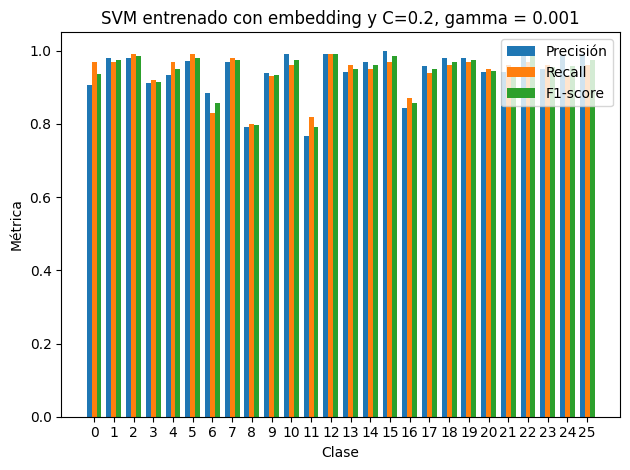

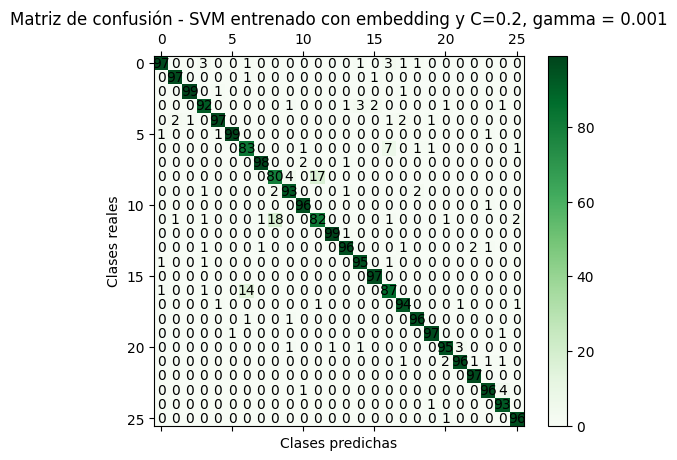

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       107
           1       0.97      0.98      0.97        99
           2       0.99      0.98      0.99       101
           3       0.92      0.91      0.92       101
           4       0.97      0.93      0.95       104
           5       0.99      0.97      0.98       102
           6       0.83      0.88      0.86        94
           7       0.98      0.97      0.98       101
           8       0.80      0.79      0.80       101
           9       0.93      0.94      0.93        99
          10       0.96      0.99      0.97        97
          11       0.82      0.77      0.79       107
          12       0.99      0.99      0.99       100
          13       0.96      0.94      0.95       102
          14       0.95      0.97      0.96        98
          15       0.97      1.00      0.98        97
          16       0.87      0.84      0.86       103
          17       0.94    

In [56]:
metrics(y_testNN, y_predNN,'SVM entrenado con embedding y C=0.2, gamma = 0.001',unique_labelsNN)

Función que implementa validación cruzada de k pliegues

In [23]:


def cross_validation(x_train, y_train, k):

    kf = KFold(n_splits=k)

    y_preds = []
    y_tests = []
    models = []
    accuracies = []

    for train_index, test_index in kf.split(x_train):
        x_trainset, x_testset = x_train[train_index], x_train[test_index]
        y_trainset, y_testset = y_train[train_index], y_train[test_index]

        svm_model, y_pred = trainSVM(x_trainset, y_trainset, x_testset)
        
        models.append(svm_model)
        accuracies.append(accuracy_score(y_testset, y_pred))
        y_preds = y_preds + list(y_pred)
        y_tests = y_tests + list(y_testset)


    return models, y_preds, y_tests, accuracies

Entrenando el modelo con K-Cross Validation

In [27]:

#Juntando los conjuntos de prueba y entrenamiento para usarlos indistintamente en k-cross validation.
# Se usan los que tuvieron mejor rendimiento (embeddings).
x_KCV = np.concatenate((x_trainNN,x_testNN))
y_KCV = np.concatenate((y_trainNN,y_testNN))

In [28]:
models, y_preds, y_tests, accuracies = cross_validation(x_KCV, y_KCV, 10)

In [32]:
accuracies = np.array(accuracies)
errors = 1-accuracies

In [34]:
print(accuracies)

[0.97202797 0.96398601 0.96818182 0.96748252 0.97377622 0.97097902
 0.96923077 0.96853147 0.96818182 0.94230769]


In [35]:
print(errors)

[0.02797203 0.03601399 0.03181818 0.03251748 0.02622378 0.02902098
 0.03076923 0.03146853 0.03181818 0.05769231]


Media y error promedio

In [29]:
np.mean(accuracies)

0.9664685314685315

In [36]:
np.mean(errors)

0.033531468531468545

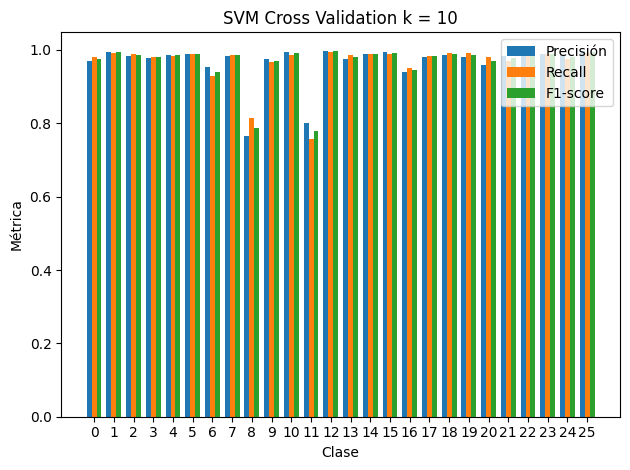

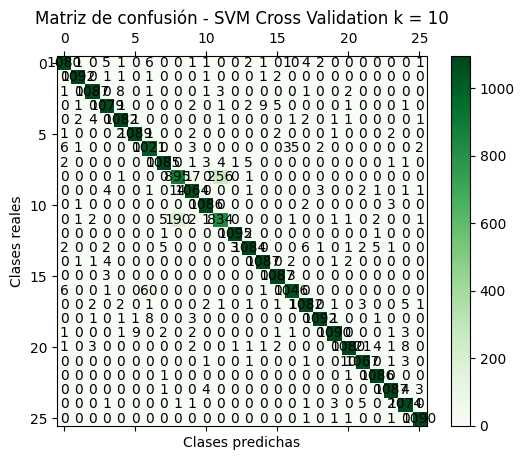

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1115
           1       0.99      0.99      0.99      1099
           2       0.99      0.98      0.99      1104
           3       0.98      0.98      0.98      1102
           4       0.98      0.99      0.99      1096
           5       0.99      0.99      0.99      1100
           6       0.93      0.95      0.94      1070
           7       0.99      0.98      0.99      1103
           8       0.81      0.76      0.79      1170
           9       0.97      0.97      0.97      1092
          10       0.99      0.99      0.99      1092
          11       0.76      0.80      0.78      1041
          12       1.00      1.00      1.00      1099
          13       0.99      0.97      0.98      1112
          14       0.99      0.99      0.99      1098
          15       0.99      0.99      0.99      1093
          16       0.95      0.94      0.94      1114
          17       0.98    

In [30]:
metrics(y_tests, y_preds,'SVM Cross Validation k = 10',unique_labels_test)

Ahora, usando Bagging sobre el modelo y conjunto de embeddings para ver los resultados que se obtienen al hacer un ensemble de estos modelos.

In [52]:

bagging_SVM = BaggingClassifier(estimator=svmNN, n_estimators=10)


bagging_SVM.fit(x_trainNN, y_trainNN)

y_pred_bagging = bagging_SVM.predict(x_testNN)



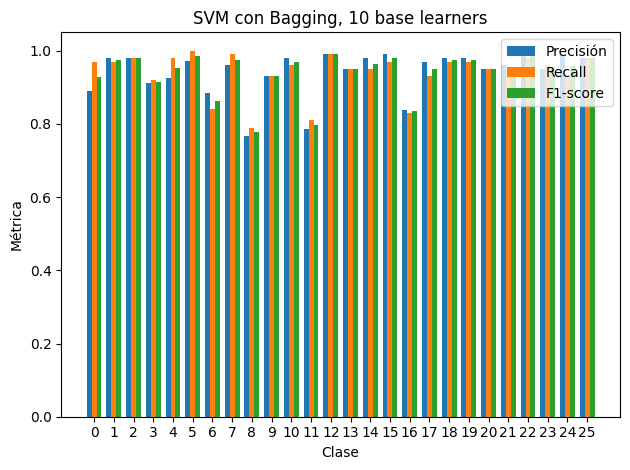

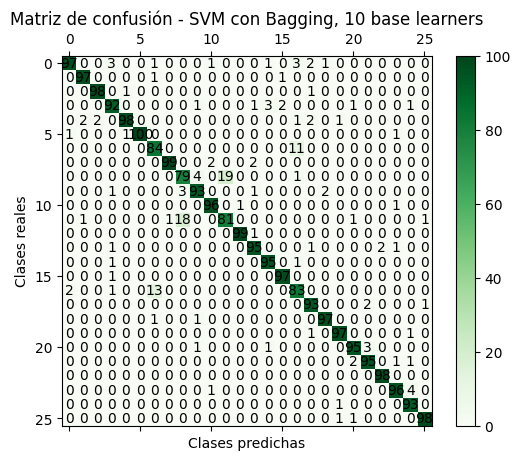

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       109
           1       0.97      0.98      0.97        99
           2       0.98      0.98      0.98       100
           3       0.92      0.91      0.92       101
           4       0.98      0.92      0.95       106
           5       1.00      0.97      0.99       103
           6       0.84      0.88      0.86        95
           7       0.99      0.96      0.98       103
           8       0.79      0.77      0.78       103
           9       0.93      0.93      0.93       100
          10       0.96      0.98      0.97        98
          11       0.81      0.79      0.80       103
          12       0.99      0.99      0.99       100
          13       0.95      0.95      0.95       100
          14       0.95      0.98      0.96        97
          15       0.97      0.99      0.98        98
          16       0.83      0.84      0.83        99
          17       0.93    

In [53]:
metrics(y_testNN, y_pred_bagging,'SVM con Bagging, 10 base learners',unique_labelsNN)